In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

## Import Data

In [2]:
# import data
path = 'data\\processed\\df_quarter_roe_average_08_09.csv'
key_path = 'data\\processed\\df_price07_18.csv'

df = pd.read_csv(path)
df.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df.index = df['Stock']
df.drop('Stock', axis=1, inplace = True)

df_key = pd.read_csv(key_path)
df_key.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
new = df_key['Stock'].str.split('_', expand=True)

df_key['symbol'] = new[0]
df_key['company'] = new[1]
df_key.index = df_key['symbol']
df_key = df_key[['symbol', 'company']]
df_key.sort_index(inplace=True)

#df
#df_key

## Limit stocks to SP500 that traded daily throughout the duration

In [3]:
# define indices

idx_key = df_key.index
idx = df.index

# drop stocks from eps dataframe

idx_diff1 = idx.difference(idx_key)
df.drop(idx_diff1, inplace=True)
df.shape

(300, 2)

## Exploratory Scatterplot

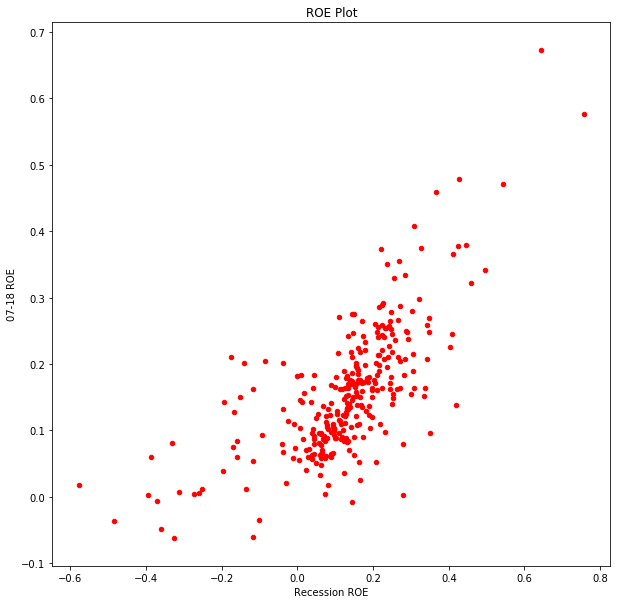

In [4]:
# plot

df.plot(kind='scatter', x='Recession ROE', y='07-18 ROE', title='ROE Plot', figsize=(10,10), color='r')

## Implementing Hypothesis - EPS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


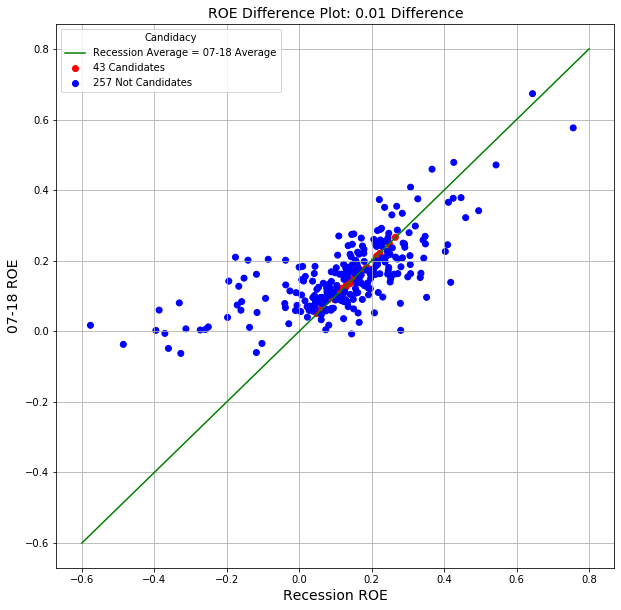

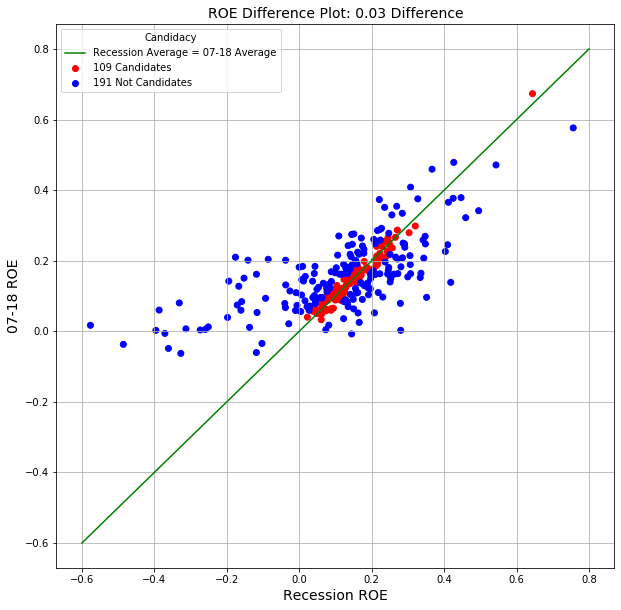

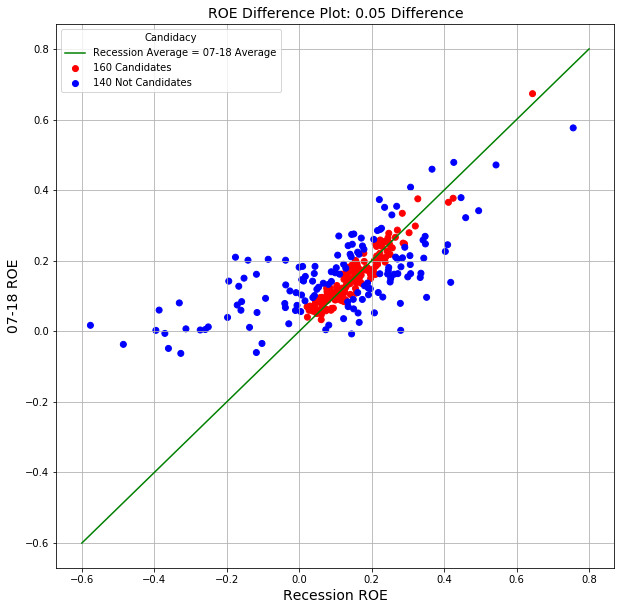

In [5]:
# define colors assignment

colors = {1:'red', 0:'blue'}
sub_title_font =14
legend_font =8
axis_font = 10
x = np.linspace(-0.6, 0.8, 100)
y=x

for diff in [0.01, 0.03, 0.05]:
    df['hypothesis']=np.where(abs(df['Recession ROE']-df['07-18 ROE']) <= diff, 1, 0)

    df_cand = df[df['hypothesis']==1]
    df_not = df[df['hypothesis']==0]
    
    df_cand['colors'] = 'red'
    df_not['colors'] = 'blue'
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    cand = ax.scatter(df_cand['Recession ROE'], df_cand['07-18 ROE'], c=df_cand.colors, label='{} Candidates'.format(len(df_cand.index)))
    not_cand = ax.scatter(df_not['Recession ROE'], df_not['07-18 ROE'], c=df_not.colors, label='{} Not Candidates'.format(len(df_not.index)))
    line = ax.plot(x, y, c="green", label='Recession Average = 07-18 Average')

    plt.xlabel('Recession ROE', fontsize=sub_title_font)
    plt.ylabel('07-18 ROE', fontsize=sub_title_font)
    plt.title('ROE Difference Plot: {} Difference'.format(diff), fontsize=sub_title_font)
    ax.tick_params(axis="x", labelsize=axis_font)
    ax.tick_params(axis="y", labelsize=axis_font)

    plt.grid(which='major')
    ax.legend(loc = 'upper left', title='Candidacy')
    plt.show()

## Filter stocks to ideal Candidate pool

### Let's pick the top 20% of resistant stocks for our pool

In [6]:
# build candidate pool from EPS

ratio = int(round(len(df.index)*0.2))
df_cand = df
df_cand['difference'] = abs(df['Recession ROE']-df['07-18 ROE'])
df_cand.sort_values(by=['difference'], inplace=True)
df_cand = df_cand.iloc[0:ratio, [0, 1, 3]]

In [7]:
# this looks right

df_cand

,Recession ROE,07-18 ROE,difference
Stock,,,
UA,0.131050,0.131415,0.000365
TXT,0.132825,0.132448,0.000377
TGT,0.171875,0.171494,0.000381
AMGN,0.213800,0.213265,0.000535
KO,0.265350,0.266310,0.000960
CERN,0.144000,0.145277,0.001277
XLNX,0.222375,0.220785,0.001590
DHR,0.129275,0.127673,0.001602
MET,0.064550,0.066396,0.001846


### Print list of Candidate Stocks

In [8]:
df_cand.sort_index(inplace=True)
for i in df_cand.index:
    print(i, df_key.loc[i, 'company'])

AFL AFLAC INC
AIZ ASSURANT INC
AJG GALLAGHER ARTHUR J & CO
AKAM AKAMAI TECHNOLOGIES INC
AME AMETEK INC NEW
AMGN AMGEN INC
ANSS ANSYS INC
BBT B B & T CORP
BLL BALL CORP
CAH CARDINAL HEALTH INC
CERN CERNER CORP
CINF CINCINNATI FINANCIAL CORP
CMS C M S ENERGY CORP
CVS CVS CORP
DGX QUEST DIAGNOSTICS INC
DHR DANAHER CORP
DTE D T E ENERGY CO
DUK DUKE ENERGY CORP
EBAY EBAY INC
ED CONSOLIDATED EDISON INC
EFX EQUIFAX INC
EMR EMERSON ELECTRIC CO
ETN EATON CORP
EXPD EXPEDITORS INTERNATIONAL WA INC
FRT FEDERAL REALTY INVESTMENT TRUST
HAS HASBRO INC
HOG HARLEY DAVIDSON INC
HST HOST HOTELS & RESORTS INC
HUM HUMANA INC
ISRG INTUITIVE SURGICAL INC
KO COCA COLA CO
KSS KOHLS CORP
LNT ALLIANT ENERGY CORP
MAC MACERICH CO
MET METLIFE INC
NFLX NETFLIX INC
NSC NORFOLK SOUTHERN CORP
NTRS NORTHERN TRUST CORP
PCAR PACCAR INC
PKI PERKINELMER INC
PWR QUANTA SERVICES INC
PXD PIONEER NATURAL RESOURCES CO
QCOM QUALCOMM INC
RCL ROYAL CARIBBEAN CRUISES LTD
REG REGENCY CENTERS
RJF RAYMOND JAMES FINANCIAL INC
ROP ROPTER